In [4]:
import numpy as np
import cv2
import cv2 as cv
import imutils
from matplotlib import pyplot as plt

In [5]:
image = cv2.imread("IMG-20200311-WA0003.jpg")

In [6]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

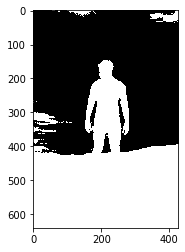

In [7]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

In [8]:
# find the contours from the thresholded image
contours, hierarchy = cv.findContours(binary, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# draw all contours
image = cv.drawContours(image, contours, -1, (0, 255, 0), 2)

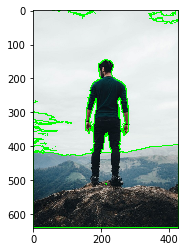

In [9]:
# show the image with the drawn contours
plt.imshow(image)
plt.show()

In [84]:
# import the necessary packages
from __future__ import print_function
from imutils.object_detection import non_max_suppression
from imutils import paths
import numpy as np
import imutils
import cv2

# initialize the HOG descriptor/person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# load the image and resize it to (1) reduce detection time
# and (2) improve detection accuracy
image = cv2.imread("IMG-20200311-WA0001.jpg")
image = imutils.resize(image, width=min(400, image.shape[1]))
orig = image.copy()

# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4,4),
    padding=(8,8), scale=1.05)

# draw the original bounding boxes
for (x, y, w, h) in rects:
    cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)

# apply non-maxima suppression to the bounding boxes using a fairly large overlap threshold to try to maintain overlapping
# boxes that are still people
rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.65)

# draw the final bounding boxes
width = 0 # stored the width to reshape the overlay image
for (xA, yA, xB, yB) in pick:
    cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 1)
    width = xB

# show some information on the number of bounding boxes
# filename = imagePath[imagePath.rfind("/") + 1:]
print("[INFO] {}: {} original boxes, {} after suppression".format(
    "IMG-20200311-WA0003.jpg", len(rects), len(pick)))
# show the output images
cv2.imshow("Before NMS", orig)
cv2.imshow("After NMS", image)
cv2.waitKey(0)

[INFO] IMG-20200311-WA0003.jpg: 3 original boxes, 2 after suppression


-1

In [72]:
print(rects, pick)

[[135  51 244 269]
 [239  64 329 244]
 [196  40 318 283]] [[196  40 318 283]]


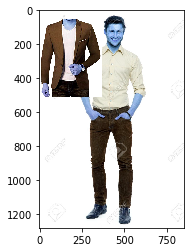

In [82]:
background = cv2.imread('IMG-20200311-WA0002.jpg')
overlay = cv2.imread('41J60RhwRhL-removebg-preview.png')
rows,cols,channels = overlay.shape
# overlay=cv2.addWeighted(background[250:250+rows, 0:0+cols],0,overlay,1,1)
background[250-pick[0][0]:250+rows-pick[0][0], 0:0+cols] = overlay
plt.imshow(background, interpolation='nearest')
plt.show()

In [79]:
print(background.shape, overlay.shape)

(1280, 852, 3) (456, 371, 3)


In [80]:
pick[0][0]

196

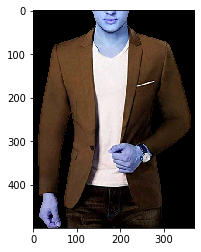

In [16]:
plt.imshow(overlay, interpolation='nearest')
plt.show()